##### SMARTLOANER PROJECT: INTELLIGENT LOAN APPROVAL SYSTEM with Machine Learning Framework
We leveraged Machine Learning to build a system (model) that approves or rejects loan applications based on the previous loan information. 

In [74]:
# importing basic necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
lts = pd.read_csv('.lema/data/LoansTrainingSetV2.csv')

# Removing the extra spaces between the rows
lts = lts.dropna(how='all')

# Save the cleaned DataFrame back to a CSV file
lts.to_csv('lts.csv', index=False)

# reading the dataset from the new directory
df = pd.read_csv('lts.csv')

# parsing into dataframe
df = pd.DataFrame(df)

C:\Users\omoba\AppData\Local\Temp\ipykernel_13560\2755400068.py:17: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/lts.csv')


##### DATA EXPLORATION: Understanding the dataset

In [75]:
# dropping the duplicates
df = df.drop_duplicates()

# columns, non-null count, dtypes
df.info()

# statistical description of the numerical columns
df.describe()

# Top 5 heading rows
df.head(5)

# checking the rows and columns
df.shape

# checking each columns against data dictionary
df["Column_Name"].value_counts()
df.isnull().sum().sort_values(ascending=False)

COLUMNS: 111105
ROWS: 19



In [76]:
# OBSERVATIONS FROM EXPLORATION:
"""
1. Credit Score: Has values above 800, from addition of a leading zero.
2. Unique rows are 88,908
3. House Ownership has HaveMortgage which is same as Home Mortgage
4. other and Others were redundant in Purpose
5. Missing values exists in Tax Lien, Bankruptcies, Month since last deliquent, Annual Income, Credit Score
6. #VALUE in Maximum Open Credit
7. Different inconsistent notations of values in Years in current job 
"""

'\n1. Credit Score: Has values above 800, from addition of a leading zero.\n2. Unique rows are 88,908\n3. House Ownership has HaveMortgage which is same as Home Mortgage\n4. other and Others were redundant in Purpose\n5. Missing values exists in Tax Lien, Bankruptcies, Month since last deliquent, Annual Income, Credit Score\n6. #VALUE in Maximum Open Credit\n7. Different inconsistent notations of values in Years in current job \n'

##### **DATA CLEANING**

In [77]:
# removing duplicates with loan_id
df = df.drop_duplicates(subset=["Loan ID"])

# replace the other with Other 
df['Purpose'] = df['Purpose'].replace('other', 'Other')

# fill NaN values with Zero
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

# fill NaN values with Zero
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

# fill NaN values with zero
df['Tax Liens'] = df['Tax Liens'].fillna(0)

# replace the Have Mortage data with Home Mortgage
df['Home Ownership'] = df['Home Ownership'].replace('HaveMortgage', 'Home Mortgage')


In [78]:
# dropping the 2 #VALUE! rows in Maximum Open Credit
df = df[df["Maximum Open Credit"] != "#VALUE!"]

# changing type as float
df["Maximum Open Credit"] = df["Maximum Open Credit"].astype(int)

In [79]:
# cleaning the Years in current job (extracting integers)
df["Years in current job"] = df['Years in current job'].astype(str)

df["Years in current job"] = df["Years in current job"].str.extract('(\d+)').astype("Int64")

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\omoba\AppData\Local\Temp\ipykernel_13560\3462036081.py:4: SyntaxWarning: invalid escape sequence '\d'
  df["Years in current job"] = df["Years in current job"].str.extract('(\d+)').astype("Int64")


In [80]:
mode_value = int(df['Years in current job'].mode().iloc[0])  # Cast mode to int64
df['Years in current job'] = df['Years in current job'].replace(np.nan, mode_value)

In [81]:
# Slicing the data to remove the leading zeroes
df["Credit Score"] = df["Credit Score"].astype(str).str[:3]

# converting back to float
df["Credit Score"] = df["Credit Score"].astype(float)

In [82]:
# Drop rows with NaN in 'Credit Score' and reset index
df1 = df.dropna(subset=['Credit Score']).reset_index(drop=True)

In [83]:
# encoding the Loan Status column - Loan Given: 1 and Loan Refused: 0
df1['Loan Status'] = df1['Loan Status'].apply(lambda x: 1 if x == 'Loan Given' else 0)

# encoding the Term column - Long Term: 1 and Short Term: 0 
df1['Term'] = df1['Term'].apply(lambda x: 1 if x == 'Long Term' else 0)

In [84]:
# Convert the 'Monthly Debt' column to strings
df1['Monthly Debt'] = df1['Monthly Debt'].astype(str)

# Replace '$' with an empty string
df1['Monthly Debt'] = df1['Monthly Debt'].str.replace('$', '')

# Convert the column to float
df1['Monthly Debt'] = df1['Monthly Debt'].astype(float)

In [85]:
# dropping the 2 #VALUE! rows in Maximum Open Credit

df1 = df1[df1["Maximum Open Credit"] != "#VALUE!"]

# changing type as float
df1["Maximum Open Credit"] = df1["Maximum Open Credit"].astype(float)

##### **EXPLORATORY DATA ANALYSIS**

In [86]:
#spliting in to small chunks of dataset

rejected_loans = df1[df1["Loan Status"]==0]
accepted_loans = df1[df1["Loan Status"]==1]

short_term_loans = df1[df1["Term"]==0]
long_term_loans = df1[df1["Term"]==1]

In [87]:
# Vizualizing the Rejected and Accepted Loans

print(f"Total of Loan Requests: {len(df1)}")

print(f"Rejected Loan: {len(rejected_loans)}")
print(f"% of Rejected Loan: {(len(rejected_loans) / len(df1)) * 100} %")

print(f"Accepted Loan: {len(accepted_loans)}")
print(f"% of Accepted Loan: {(len(accepted_loans) / len(df1)) * 100} %")

Total of Loan Requests: 67569
Rejected Loan: 19126
% of Rejected Loan: 28.305879915345795 %
Accepted Loan: 48443
% of Accepted Loan: 71.6941200846542 %


In [88]:
# Visualizing the Loan Terms

print(f"Short-Term Loan: {len(short_term_loans)}")
print(f"% of Short-Term Loan: {(len(short_term_loans) / len(df1)) * 100} %")

print(f"Long-Term Loan: {len(long_term_loans)}")
print(f"% of Long-Term Loan: {(len(long_term_loans) / len(df1)) * 100} %")

Short-Term Loan: 50820
% of Short-Term Loan: 75.21200550548328 %
Long-Term Loan: 16749
% of Long-Term Loan: 24.787994494516717 %


<Axes: >

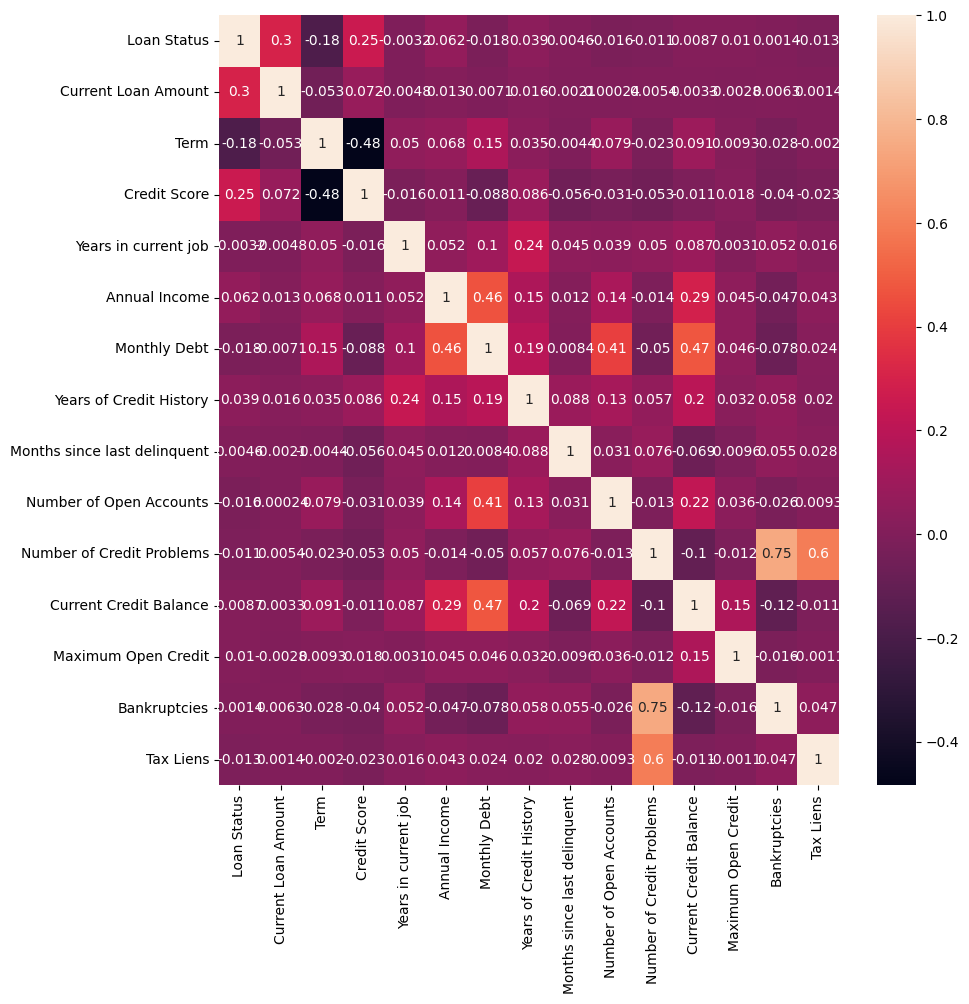

In [89]:
# Select only numerical columns
df1_numeric = df1.select_dtypes(include=['int64', 'float64'])

# Compute correlation
correlation = df1_numeric.corr()

# Create a heatmap
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlation, annot=True)


array([[<Axes: title={'center': 'Loan Status'}>,
        <Axes: title={'center': 'Current Loan Amount'}>,
        <Axes: title={'center': 'Term'}>,
        <Axes: title={'center': 'Credit Score'}>],
       [<Axes: title={'center': 'Years in current job'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Monthly Debt'}>,
        <Axes: title={'center': 'Years of Credit History'}>],
       [<Axes: title={'center': 'Months since last delinquent'}>,
        <Axes: title={'center': 'Number of Open Accounts'}>,
        <Axes: title={'center': 'Number of Credit Problems'}>,
        <Axes: title={'center': 'Current Credit Balance'}>],
       [<Axes: title={'center': 'Maximum Open Credit'}>,
        <Axes: title={'center': 'Bankruptcies'}>,
        <Axes: title={'center': 'Tax Liens'}>, <Axes: >]], dtype=object)

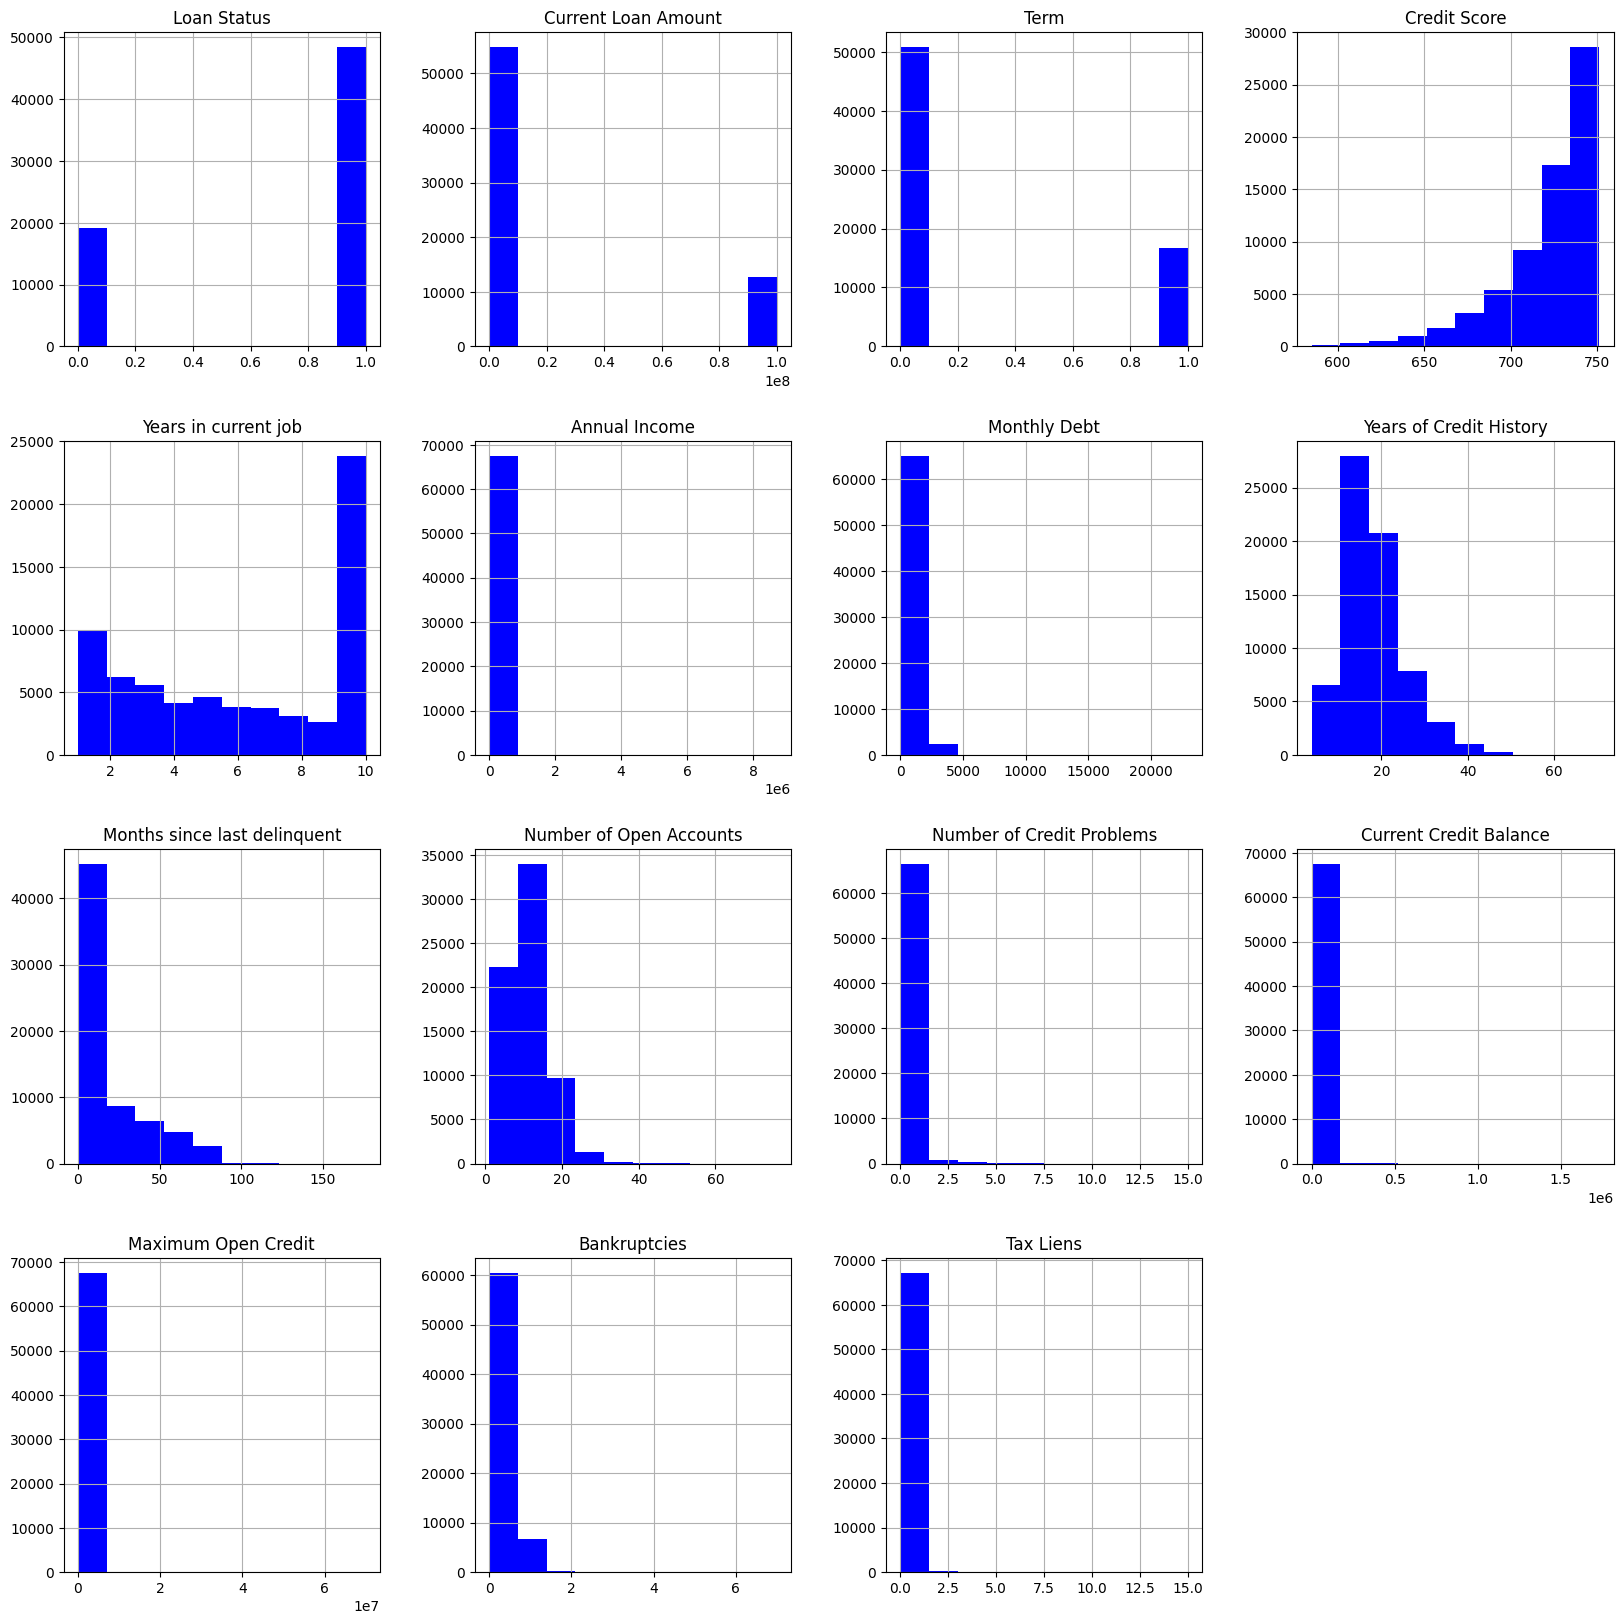

In [90]:
df1.hist(bins =10, figsize = (20,20), color = 'b')

<Axes: xlabel='Term', ylabel='count'>

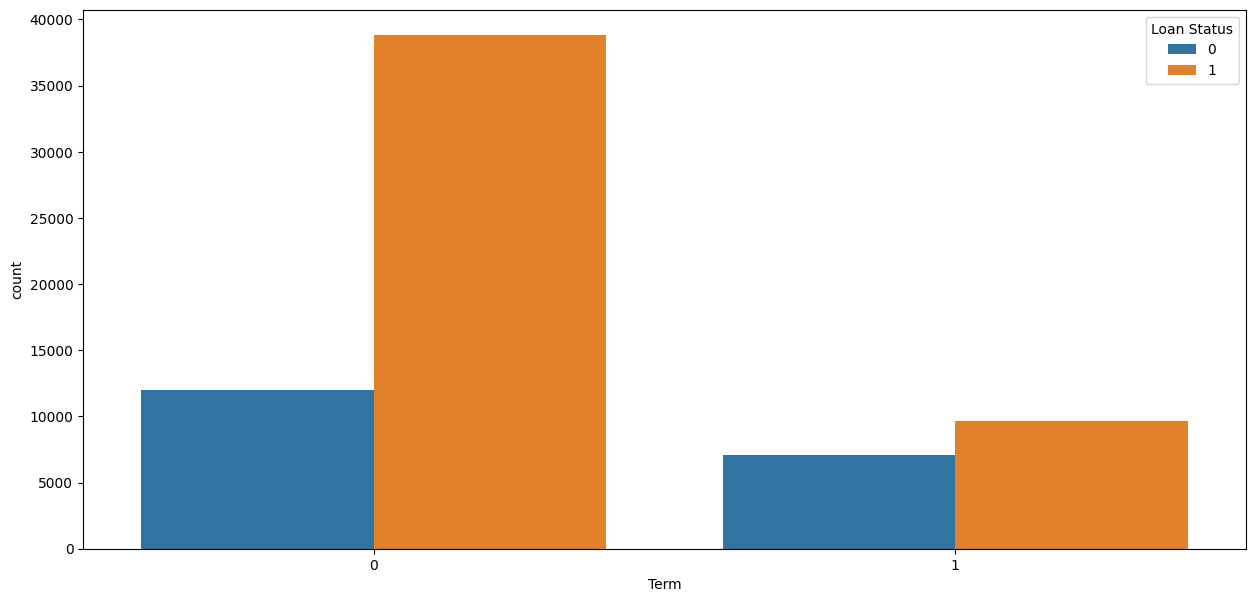

In [91]:
plt.figure(figsize=[15, 7])
sns.countplot(x = 'Term', hue = 'Loan Status', data = df1)

<Axes: xlabel='Purpose', ylabel='count'>

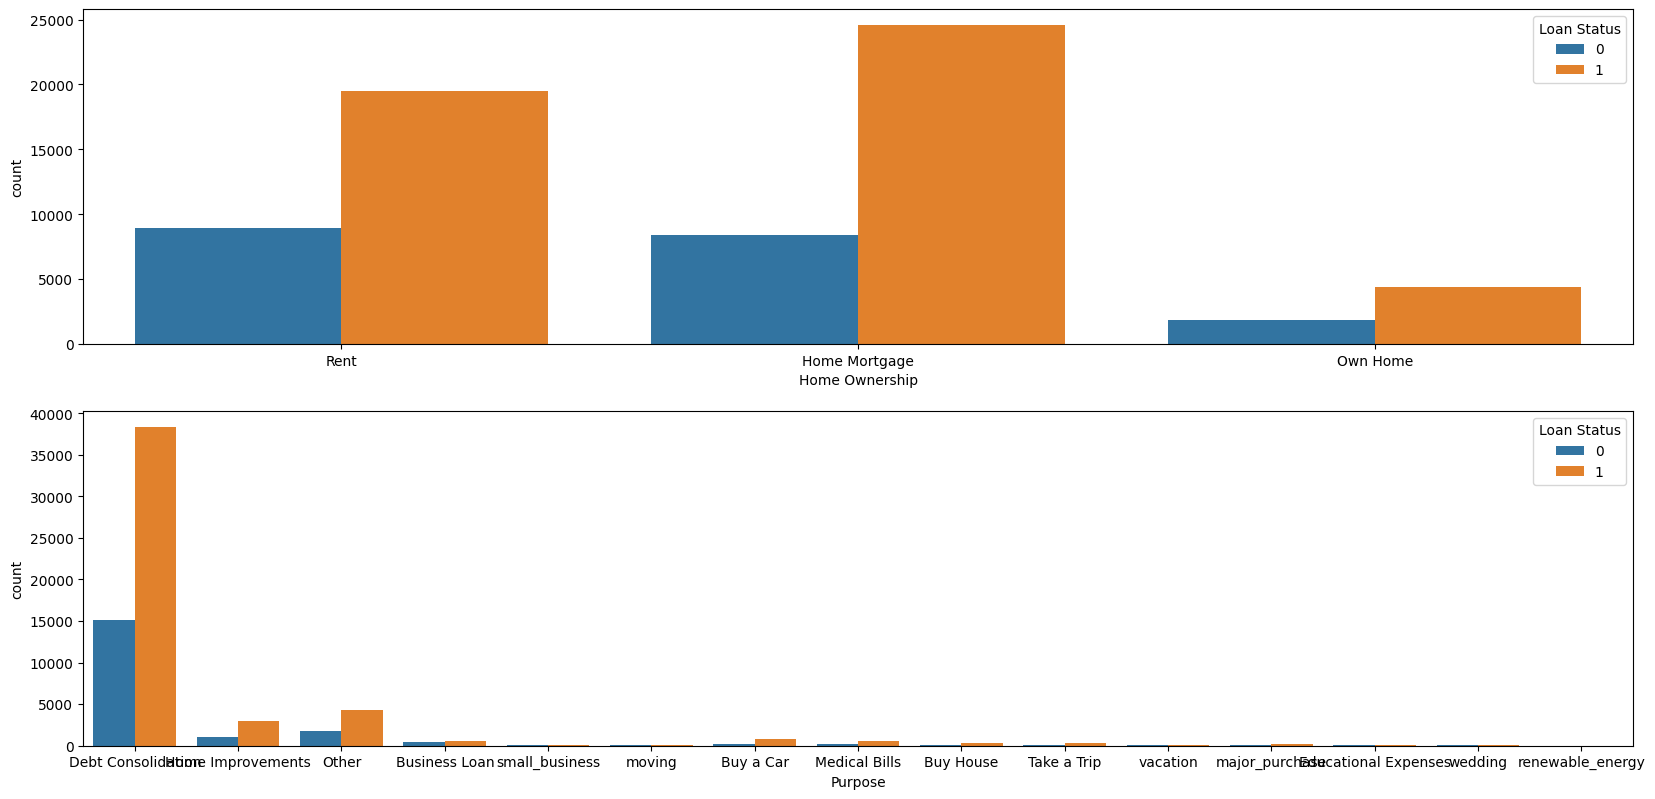

In [92]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'Home Ownership', hue = 'Loan Status', data = df1)
plt.subplot(412)
sns.countplot(x = 'Purpose', hue = 'Loan Status', data = df1)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

C:\Users\omoba\AppData\Local\Temp\ipykernel_13560\3300978985.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_loans['Credit Score'], label = 'accepted credit score', shade = True, color = 'r')
C:\Users\omoba\AppData\Local\Temp\ipykernel_13560\3300978985.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rejected_loans['Credit Score'], label = 'rejected credit score', shade = True, color = 'b')


Text(0.5, 0, 'Credit Score')

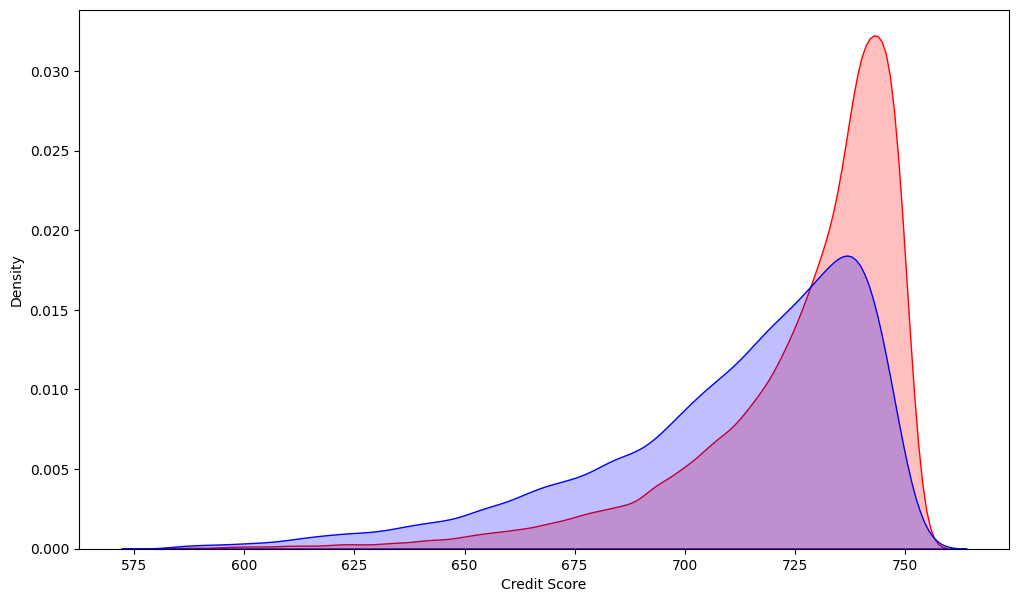

In [93]:

# Credit score for accepted and rejected loans

plt.figure(figsize=(12,7))

sns.kdeplot(accepted_loans['Credit Score'], label = 'accepted credit score', shade = True, color = 'r')
sns.kdeplot(rejected_loans['Credit Score'], label = 'rejected credit score', shade = True, color = 'b')

plt.xlabel('Credit Score')


C:\Users\omoba\AppData\Local\Temp\ipykernel_13560\2812672049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_loans['Years in current job'], label = 'Years of Current Job', shade = True, color = 'r')
C:\Users\omoba\AppData\Local\Temp\ipykernel_13560\2812672049.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rejected_loans['Years in current job'], label = 'Years of Current Job', shade = True, color = 'b')


Text(0.5, 0, 'Years of current job')

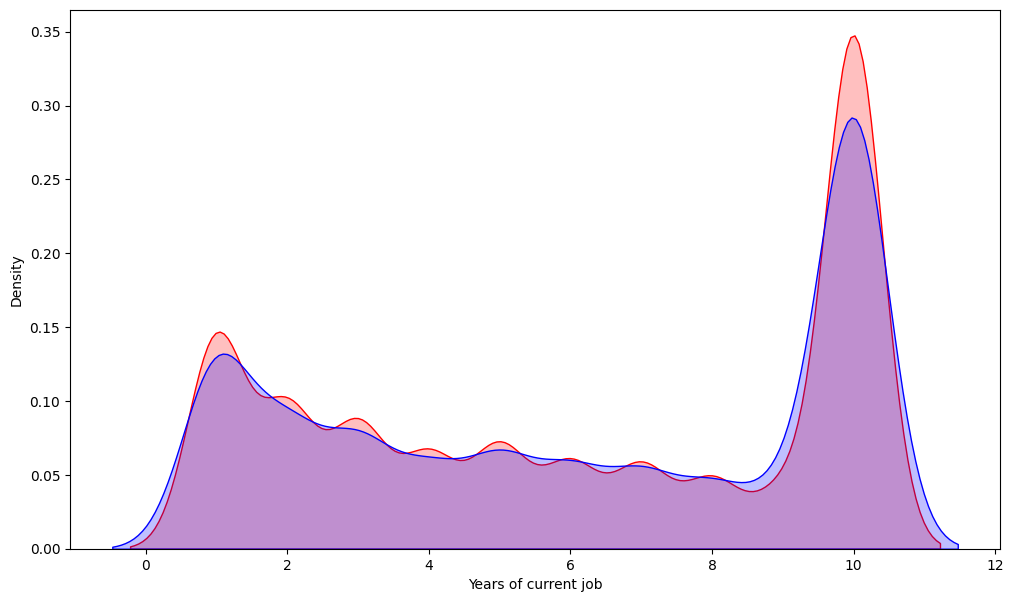

In [94]:
plt.figure(figsize=(12,7))

sns.kdeplot(accepted_loans['Years in current job'], label = 'Years of Current Job', shade = True, color = 'r')
sns.kdeplot(rejected_loans['Years in current job'], label = 'Years of Current Job', shade = True, color = 'b')

plt.xlabel('Years of current job')

In [95]:
df1.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,0,12232,0,728.0,1,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0,25014,1,733.0,10,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,0.0,14,0,35706,77961.0,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,0,16117,0,724.0,9,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815.0,1.0,0.0


##### **PREPARING DATASET**

In [96]:
# dropping columns
columns_to_drop = ['Loan ID', 'Customer ID']

df1_new = df1.drop(columns_to_drop, axis=1)

In [97]:
# spliting out the purpose column for encoding
df_purpose = df1_new['Purpose']

In [98]:
# encoding Home Ownership column

def map_values(data):
    if data == "Home Mortgage":
        return 1
    elif data == "Rent":
        return 2
    elif data == "Own Home":
        return 3
    else:
        raise Exception("Unknown data type")
    
    
df1_new["Home Ownership"] = df1_new["Home Ownership"].apply(map_values)

In [99]:
# Encoding Purpose column
from sklearn.preprocessing import OneHotEncoder

def encoding_tocol(data):
    onehotencoder = OneHotEncoder()
    data = onehotencoder.fit_transform(pd.DataFrame(data)).toarray()
    column_names = onehotencoder.get_feature_names_out()
    data = pd.DataFrame(data, columns=column_names)
    
    return data

df_purpose = encoding_tocol(df_purpose)

In [100]:
# joining the dataset
loan_dataset = pd.concat([df_purpose, df1_new], axis = 1)

In [101]:
# dropping the existing Unencoded Purpose Column
drop = ['Purpose']
loan_dataset = loan_dataset.drop(drop, axis=1)

array([[<Axes: title={'center': 'Purpose_Business Loan'}>,
        <Axes: title={'center': 'Purpose_Buy House'}>,
        <Axes: title={'center': 'Purpose_Buy a Car'}>,
        <Axes: title={'center': 'Purpose_Debt Consolidation'}>,
        <Axes: title={'center': 'Purpose_Educational Expenses'}>,
        <Axes: title={'center': 'Purpose_Home Improvements'}>],
       [<Axes: title={'center': 'Purpose_Medical Bills'}>,
        <Axes: title={'center': 'Purpose_Other'}>,
        <Axes: title={'center': 'Purpose_Take a Trip'}>,
        <Axes: title={'center': 'Purpose_major_purchase'}>,
        <Axes: title={'center': 'Purpose_moving'}>,
        <Axes: title={'center': 'Purpose_renewable_energy'}>],
       [<Axes: title={'center': 'Purpose_small_business'}>,
        <Axes: title={'center': 'Purpose_vacation'}>,
        <Axes: title={'center': 'Purpose_wedding'}>,
        <Axes: title={'center': 'Loan Status'}>,
        <Axes: title={'center': 'Current Loan Amount'}>,
        <Axes: title={

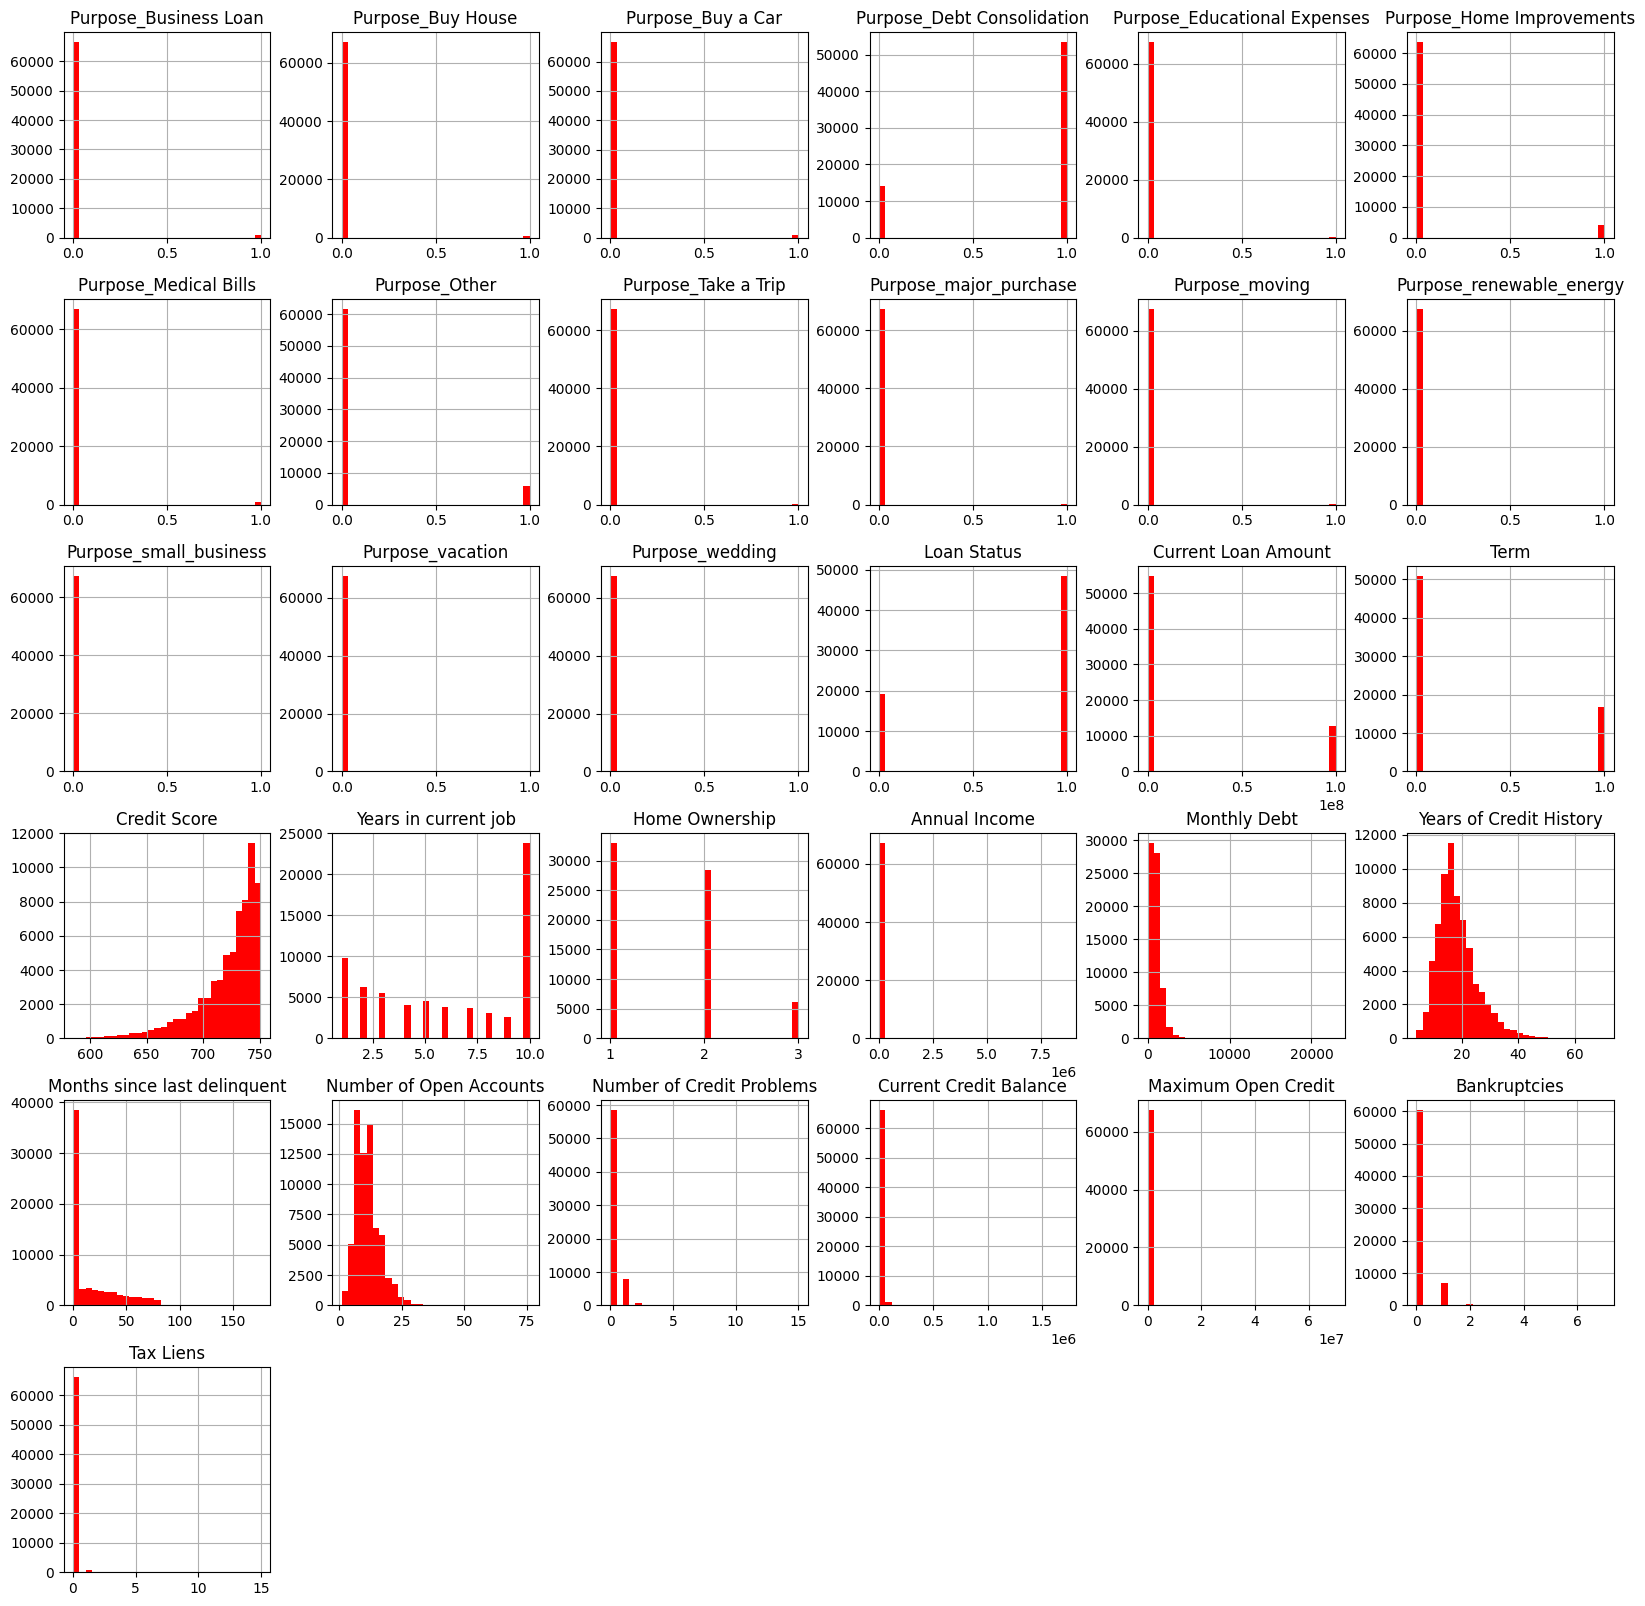

In [102]:
# PREVIEW OF THE ENTIRE DATASET
loan_dataset.hist(bins=30, figsize=(20,20), color="red")

In [103]:
# Splitting the data for training and Testing (80: Training and 20 for Testing)
from sklearn.model_selection import train_test_split
X = loan_dataset.drop('Loan Status', axis=1)
y = loan_dataset['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [104]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Test Set Accuracy: {lr_accuracy:.2%}')


#Getting the model
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

Logistic Regression Test Set Accuracy: 74.03%


Logistic Regression Test Set Accuracy: 74.03%


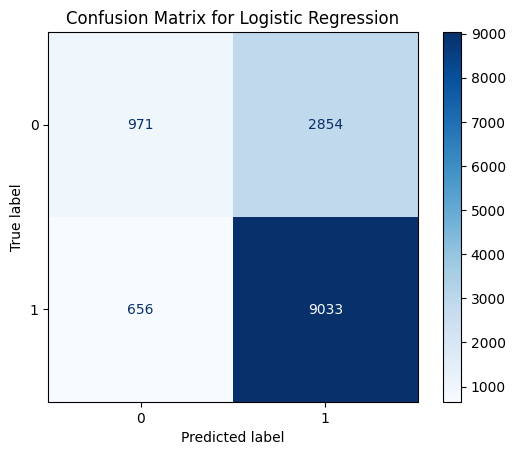

In [106]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Test Set Accuracy: {lr_accuracy:.2%}')

# Calculating the confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [107]:
# RandomForestClassifier with Cross-Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f'Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.2%}')

Random Forest Cross-Validation Accuracy: 73.73%


In [108]:
# Fit the model to the entire training data after cross-validation
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Test Set Accuracy: {rf_accuracy:.2%}')

Random Forest Test Set Accuracy: 73.69%
